In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df.shape

(10000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,completed,82,91,90
1,female,group D,associate's degree,standard,none,69,69,75
2,female,group A,bachelor's degree,standard,completed,72,77,82
3,female,group C,master's degree,standard,none,59,78,73
4,male,group C,high school,standard,completed,64,61,54


In [5]:
dff = df

In [6]:
dff = dff.rename({'race/ethnicity':'race', 'parental level of education':'parent_edu', 'lunch':'fr_lunch',
            'test preparation course':'test_prep', 'math score':'math', 'reading score':'reading',
            'writing score':'writing'}, axis='columns')
dff.gender = np.where(dff.gender == 'female', 0, 1)
dff.test_prep = np.where(dff.test_prep == 'completed', 1, 0)
dff.fr_lunch = np.where(dff.fr_lunch == 'standard', 0, 1)

In [7]:
print('Races/Ethnicities')
print(dff.race.unique())
print('\nEducation Levels')
print(dff.parent_edu.unique())

Races/Ethnicities
['group C' 'group D' 'group A' 'group B' 'group E']

Education Levels
['some college' "associate's degree" "bachelor's degree" "master's degree"
 'high school' 'some high school']


In [8]:
dff = dff.replace({'race' : {'group A':1, 'group B':2, 'group C':3, 'group D':4, 'group E':5}})
dff = dff.replace({'parent_edu' : {'some high school':1, 'high school':2, 'some college':3,
                                   'associate\'s degree':4, 'bachelor\'s degree':5,
                                   'master\'s degree': 6}})

In [9]:
dff.head()

,gender,race,parent_edu,fr_lunch,test_prep,math,reading,writing
0,0,3,3,0,1,82,91,90
1,0,4,4,0,0,69,69,75
2,0,1,5,0,1,72,77,82
3,0,3,6,0,0,59,78,73
4,1,3,2,0,1,64,61,54


In [12]:
dff.corr()

,gender,race,parent_edu,fr_lunch,test_prep,math,reading,writing
gender,1.000000,-0.000051,0.008840,-0.006814,-0.009507,0.159589,-0.239161,-0.294359
race,-0.000051,1.000000,0.010542,0.001722,-0.001862,0.214578,0.137100,0.152513
parent_edu,0.008840,0.010542,1.000000,-0.007483,-0.007229,0.201492,0.193322,0.227020
fr_lunch,-0.006814,0.001722,-0.007483,1.000000,-0.002657,-0.385709,-0.272220,-0.288999
test_prep,-0.009507,-0.001862,-0.007229,-0.002657,1.000000,0.147303,0.219303,0.301842
math,0.159589,0.214578,0.201492,-0.385709,0.147303,1.000000,0.819805,0.808001
reading,-0.239161,0.137100,0.193322,-0.272220,0.219303,0.819805,1.000000,0.953011
writing,-0.294359,0.152513,0.227020,-0.288999,0.301842,0.808001,0.953011,1.000000


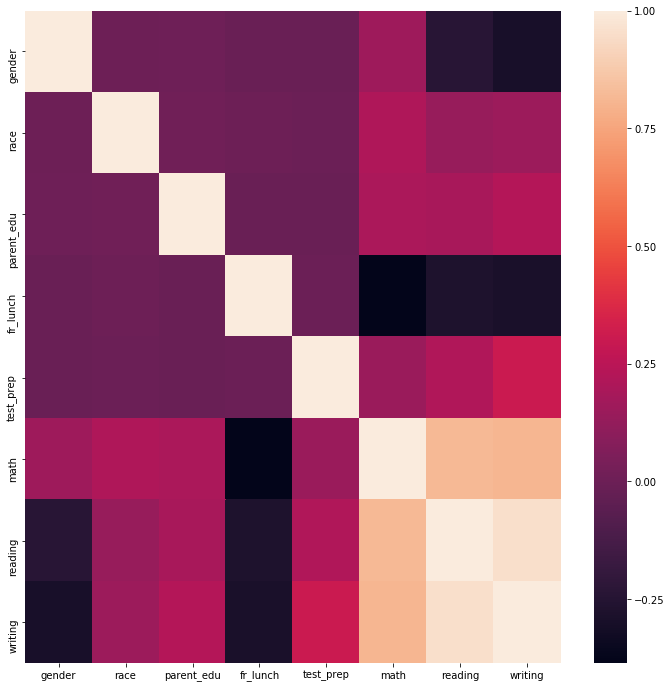

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(dff.corr())